In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D_train = pca.fit_transform(x_train)

In [4]:
X2D_train

array([[ 2.42638999e+00,  4.45092554e-01],
       [ 9.75718668e-01, -5.49682624e-01],
       [-2.57619633e+00,  8.42512263e-01],
       [ 6.80308340e-01, -4.13626027e-01],
       [-2.49201252e+00,  5.32690251e-01],
       [-3.18544377e+00, -4.78727762e-01],
       [ 1.96597964e+00,  4.13563056e-01],
       [ 6.30902580e-01, -4.69159203e-01],
       [-2.49876444e+00,  6.04961602e-01],
       [-1.56845831e-01, -6.76877123e-01],
       [-6.71568172e-01, -9.99646832e-01],
       [ 9.38978582e-01,  3.25163557e-01],
       [ 3.72382101e-01, -2.04960529e-01],
       [-2.58395000e+00,  6.21094025e-01],
       [ 2.20753997e+00,  2.14019684e-01],
       [-2.59851665e+00,  3.36076400e-01],
       [ 7.02584306e-01, -3.40748924e-01],
       [ 2.65589641e+00,  5.45911518e-01],
       [ 3.27863386e+00,  1.35698545e+00],
       [-3.17086330e+00,  1.71913254e-01],
       [ 1.21199083e+00, -1.55511621e-01],
       [-2.36850100e+00,  4.34896148e-01],
       [-2.26105330e+00,  1.26017438e-01],
       [ 1.

In [5]:
pca.components_

array([[ 0.35840863, -0.07261148,  0.85694793,  0.36319563],
       [ 0.6420514 ,  0.74270567, -0.18131639, -0.05729446]])

In [6]:
pca.explained_variance_ratio_

array([0.92294541, 0.05496896])

In [7]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X2D_train, y_train)

SVC()

In [8]:
from sklearn.metrics import accuracy_score

y_hat = svm_clf.predict(X2D_train)
accuracy_score(y_train, y_hat)

0.9666666666666667

In [9]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
y_hat = svm_clf.predict(x_train)
accuracy_score(y_train, y_hat)

0.9666666666666667

# Choosing the Right number of Dimensions

In [10]:
import numpy as np

pca = PCA()
pca.fit(x_train)
summ = sum([x for x in pca.explained_variance_ratio_])
print(summ)
cumsum = np.cumsum(pca.explained_variance_ratio_)

1.0


In [11]:
cumsum

array([0.92294541, 0.97791437, 0.99426214, 1.        ])

In [12]:
d = np.argmax(cumsum > 0.95) + 1

In [13]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)

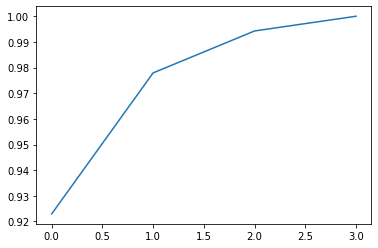

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(cumsum)

# Trying DimensionalityReduction im MNIST Dataset

In [15]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1)

In [16]:
x = mnist.data
y = mnist.target

In [17]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [18]:
pca = PCA(n_components = 0.95)
pca.fit(x_train)

PCA(n_components=0.95)

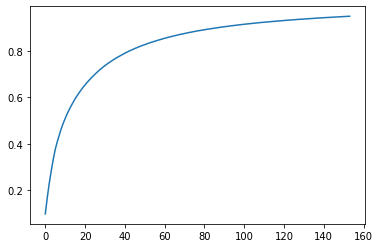

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [20]:
x_train_transformed = pca.transform(x_train)

In [21]:
x_train_transformed.shape

(60000, 154)

In [22]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train, n_batches):
    inc_pca.partial_fit(x_batch)
    
x_reduced = inc_pca.transform(x_train)

# Selecting a Kernel and Tuning Hyperparameters

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])